In [ ]:
## News Mood Observable Trends
1) For the scatter plot, it is difficult to justify the data since it seems to be all over the place. For the last
   100 tweets, all plots for BBC, CBS, CNN, Fox News, and NY Times are scattered almost evenly for -1 to 1 for the 
   tweet polarity scale. 
2) Overrall sentiment polarity is positive for BBC and CBS tweets and negative for CNN and NY Times. Sentiment is 
   neutral for Fox News.
3) From the overall media sentiment based on tweets, CBS is most positive at 25% and BBC is the second most positive
   at 12%.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import os
import seaborn as sns
from datetime import datetime

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from Twitter import consumer_key, consumer_secret, access_token, access_token_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
tweepy_api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
target_users = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"] 

sentiments = []
tweets = []

for target_user in target_users:
    counter = 1

    # Loop through 5 pages of tweets (total 100 tweets - there are 20 tweets per page based on tweety API)
    for x in range(5):

        public_tweets = tweepy_api.user_timeline(target_user, page = x+1) 

        for tweet in public_tweets: 

            compound = analyzer.polarity_scores(tweet["text"])["compound"] 
            pos = analyzer.polarity_scores(tweet["text"])["pos"] 
            neu = analyzer.polarity_scores(tweet["text"])["neu"] 
            neg = analyzer.polarity_scores(tweet["text"])["neg"] 
            tweets_ago = counter
            tweets = ("Tweet %s: %s" % (counter, tweet["text"])) 
            
            sentiments.append({"Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter,
                               "News Agency": target_user,
                               "Tweet": tweets   
                              },)
        
            counter = counter + 1 

print ("There is 100 tweets per each news agency (500 tweets total).")

There is 100 tweets per each news agency (500 tweets total).


In [3]:
sentiments_df = pd.DataFrame.from_dict(sentiments)
sentiments_df = sentiments_df[["News Agency", "Tweets Ago", "Date", "Compound","Positive", "Negative", "Neutral", "Tweet"]]
sentiments_df.head()

,News Agency,Tweets Ago,Date,Compound,Positive,Negative,Neutral,Tweet
0,@BBC,1,Thu Jul 26 16:11:16 +0000 2018,-0.2960,0.000,0.909,0.091,Tweet 1: RT @bbcpress: Late for the first game...
1,@BBC,2,Thu Jul 26 16:02:03 +0000 2018,0.2263,0.153,0.741,0.106,Tweet 2: 😀♥️ Four-year-old Daniel and 91-year-...
2,@BBC,3,Thu Jul 26 15:40:44 +0000 2018,0.0000,0.000,1.000,0.000,Tweet 3: RT @bbcweather: It is officially the ...
3,@BBC,4,Thu Jul 26 13:01:05 +0000 2018,-0.1779,0.072,0.826,0.101,"Tweet 4: ""I would like to do it all over again..."
4,@BBC,5,Thu Jul 26 12:02:06 +0000 2018,-0.4614,0.000,0.764,0.236,Tweet 5: 😮 You don't want to get between two f...


In [4]:
sentiments_df.to_csv("news_sentiments.csv", index = False)

In [5]:
cnn_sentiments_df = sentiments_df.loc[sentiments_df["News Agency"] == "@CNN"]
bbc_sentiments_df = sentiments_df.loc[sentiments_df["News Agency"] == "@BBC"]
cbs_sentiments_df = sentiments_df.loc[sentiments_df["News Agency"] == "@CBS"]
foxnews_sentiments_df = sentiments_df.loc[sentiments_df["News Agency"] == "@FoxNews"]
nytimes_sentiments_df = sentiments_df.loc[sentiments_df["News Agency"] == "@nytimes"]

In [6]:
cnn_compound_aggregate = round((cnn_sentiments_df["Compound"].mean()),2)
bbc_compound_aggregate = round((bbc_sentiments_df["Compound"].mean()),2)
cbs_compound_aggregate = round((cbs_sentiments_df["Compound"].mean()),2)
foxnews_compound_aggregate = round((foxnews_sentiments_df["Compound"].mean()),2)
nytimes_compound_aggregate = round((nytimes_sentiments_df["Compound"].mean()),2)

print (cnn_compound_aggregate)
print (bbc_compound_aggregate)
print (cbs_compound_aggregate)
print (foxnews_compound_aggregate)
print (nytimes_compound_aggregate)

-0.12
0.07
0.25
-0.0
-0.05


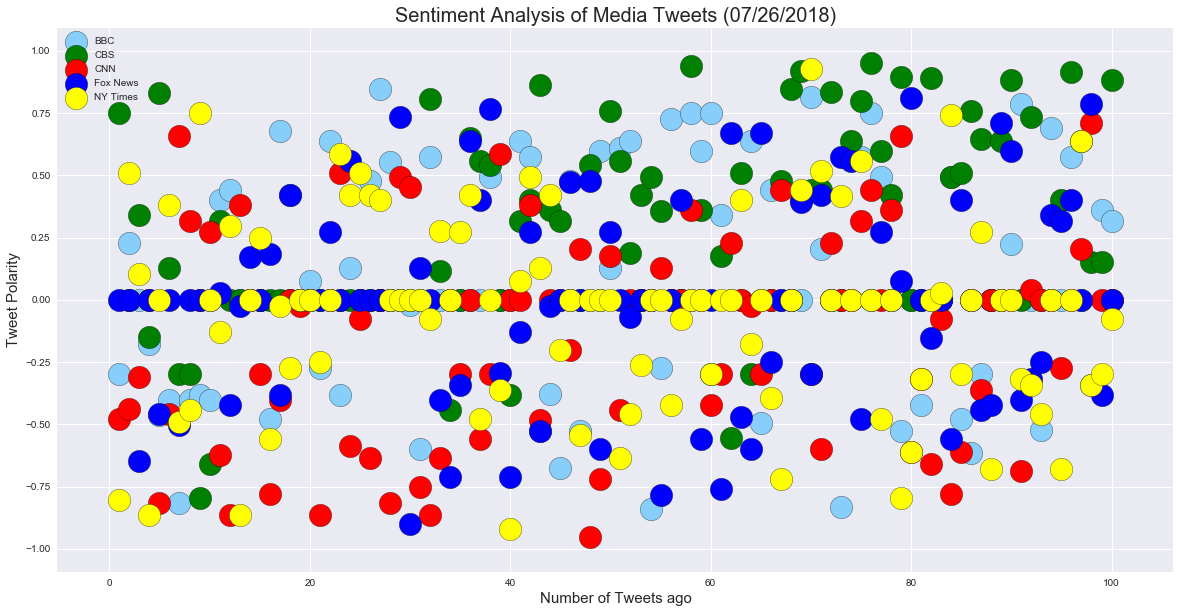

In [7]:
sns.set()

#plot for BBC tweets
main_plot = bbc_sentiments_df.plot(kind='scatter', x= 'Tweets Ago', 
                         y= "Compound", color = "lightskyblue",edgecolors="black", 
                         grid=True,  figsize=(20,10),  
                         legend = True, label = "BBC", s = 500)
                     
#plot for CBS Tweets
cbs_sentiments_df.plot(kind = 'scatter',x= 'Tweets Ago', 
                         y= "Compound", color = "green",edgecolors="black", 
                         grid=True,  figsize=(20,10),  
                         legend = True, label = "CBS", s = 500, ax = main_plot)

#plot for CNN Tweets
cnn_sentiments_df.plot(kind = 'scatter',x= 'Tweets Ago', 
                         y= "Compound", color = "red",edgecolors="black", 
                         grid=True,  figsize=(20,10),  
                         legend = True, label = "CNN", s = 500, ax = main_plot)


#plot for Fox News Tweets
foxnews_sentiments_df.plot(kind = 'scatter',x= 'Tweets Ago', 
                         y= "Compound", color = "blue",edgecolors="black", 
                         grid=True,  figsize=(20,10),  
                         legend = True, label = "Fox News", s = 500, ax = main_plot)


#plot for NY Times Tweets
nytimes_sentiments_df.plot(kind = 'scatter',x= 'Tweets Ago', 
                         y= "Compound", color = "yellow",edgecolors="black", 
                         grid=True,  figsize=(20,10),  
                         legend = True, label = "NY Times", s =500, ax = main_plot)

plt.xlabel('Number of Tweets ago', fontsize = 15)
plt.ylabel("Tweet Polarity", fontsize = 15)

today_date = datetime.now().strftime('%m/%d/%Y')
plt.title(f"Sentiment Analysis of Media Tweets ({today_date})", fontsize = 20)

plt.savefig("Sentiment_Analysis.png")

plt.show()

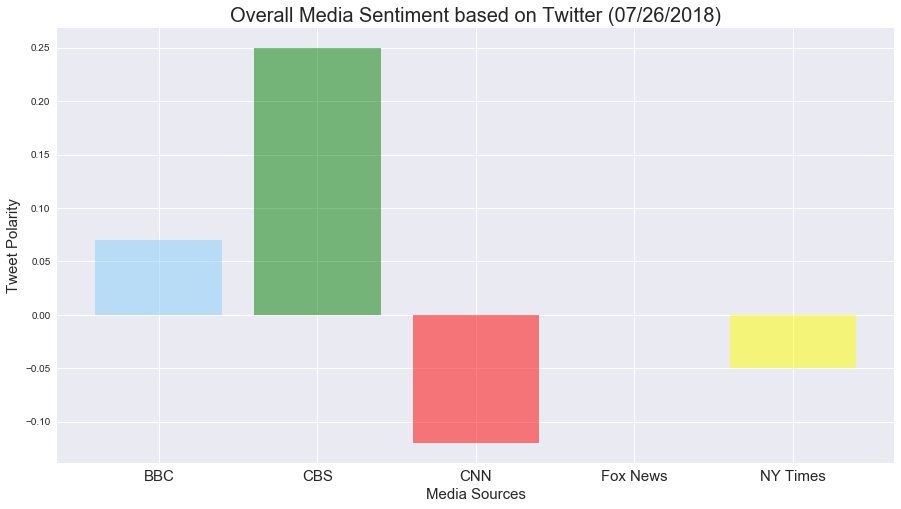

In [9]:
channels = [bbc_compound_aggregate, cbs_compound_aggregate, cnn_compound_aggregate, foxnews_compound_aggregate, nytimes_compound_aggregate]
x_axis = np.arange(len(channels))

plt.bar(x_axis, channels, color=['lightskyblue', 'green', 'red', 'blue', 'yellow'], alpha=0.5, align="edge")

tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "Fox News", "NY Times"], fontsize = 15)
plt.xlabel('Media Sources', fontsize = 15)
plt.ylabel("Tweet Polarity", fontsize = 15)

today_date = datetime.now().strftime('%m/%d/%Y')
plt.title(f"Overall Media Sentiment based on Twitter ({today_date})", fontsize = 20)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

plt.savefig("Overall_Media_Sentiment.png")

plt.show()